In [20]:
import matplotlib.pyplot as plt
from matplotlib.colors import TwoSlopeNorm
import numpy as np
import os

In [29]:
PATH_SOURCE = "/home/jbassham/jack/data/weddell/1992_2020"
PATH_DEST = os.path.join(PATH_SOURCE,'plots_1')

In [8]:
fnam = "motion_ppv4_latlon_sh_1992_2020.npz"

data = np.load(os.path.join(PATH_SOURCE, fnam), allow_pickle=True)
ui = data['u'] # zonal ice velocity
vi = data['v'] # meridional ice velocity
error = data['error']
lat = data['lat']
lon = data['lon']
time = data['time']

In [9]:
fnam = "con_nimbus7_latlon_sh_1992_2020.npz"

data = np.load(os.path.join(PATH_SOURCE, fnam), allow_pickle=True)
ic = data['ic'] # zonal ice velocity

In [10]:
fnam = "wind_JRA55_latlon_global_1992_2020.npz"

data = np.load(os.path.join(PATH_SOURCE, fnam), allow_pickle=True)
uw = data['u']
vw = data['v']

In [11]:

# Mask ice concentration

ic_raw = np.round(ic * 250)

# Mask 
# 251 pole hole
# 252 unused data
# 253 coastline
# 254 land
ic = np.where((ic_raw == 251) | (ic_raw == 252) | (ic_raw == 253) | (ic_raw == 254), np.nan, ic)

# Filter points with ice error greater than 999 and 0 concentration ice motion
# Create mask
mask = (ic == 0) | (np.isnan(ic)) | (error >= 999) | (error <= -999)
# less than 

# Mask points
ui = np.where(mask, np.nan, ui) 
uv = np.where(mask, np.nan, vi)

/tmp/ipykernel_1951769/2018133260.py:2: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(ui, axis = 0)


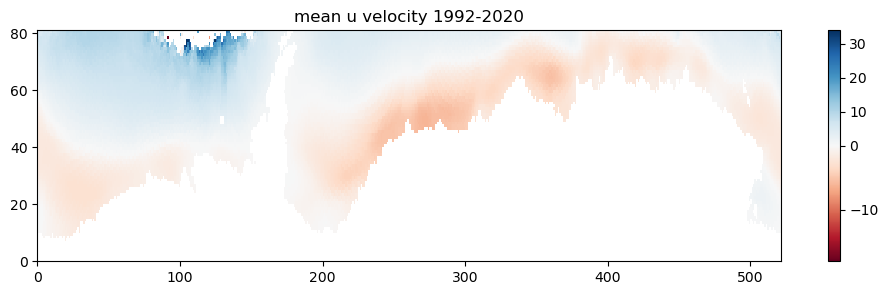

In [26]:
title = 'mean u velocity 1992-2020 14NOV24'
mean_u = np.nanmean(ui, axis = 0)

cmap = 'RdBu'
norm = TwoSlopeNorm(vcenter = 0)

plt.figure(figsize = (12,3))
plt.pcolormesh(mean, cmap = cmap, norm = norm)
plt.colorbar()
plt.title(title)
plt.show()

/tmp/ipykernel_1951769/860516491.py:2: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(vi, axis = 0)


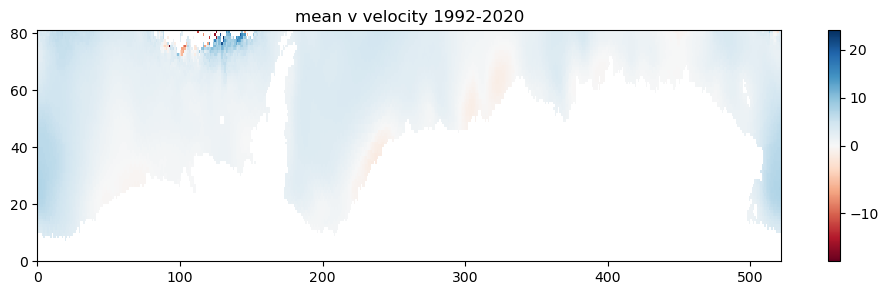

In [27]:
title = 'mean v velocity 1992-2020 14NOV24'
mean_v = np.nanmean(vi, axis = 0)

cmap = 'RdBu'
norm = TwoSlopeNorm(vcenter = 0)

plt.figure(figsize = (12,3))
plt.pcolormesh(mean, cmap = cmap, norm = norm)
plt.colorbar()
plt.title(title)
plt.show()

/tmp/ipykernel_1951769/722298767.py:2: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(ic, axis = 0)


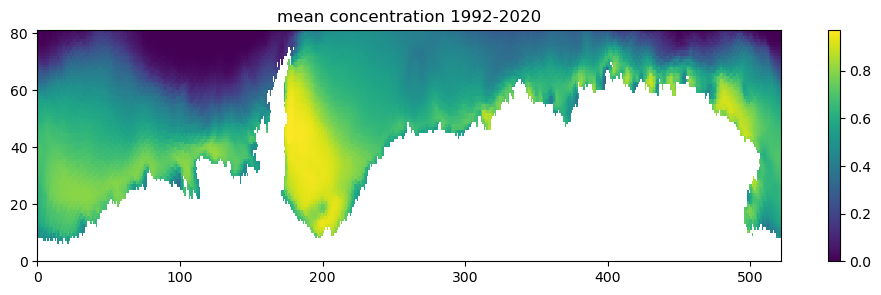

In [28]:
title = 'mean concentration 1992-2020 14NOV24'
mean_c = np.nanmean(ic, axis = 0)

plt.figure(figsize = (12,3))
plt.pcolormesh(mean)
plt.colorbar()
plt.title(title)
plt.show()

/tmp/ipykernel_1951769/1898314625.py:1: RuntimeWarning: Mean of empty slice
  mean_u = np.nanmean(ui, axis = 0)
/tmp/ipykernel_1951769/1898314625.py:3: RuntimeWarning: Mean of empty slice
  mean_v = np.nanmean(vi, axis = 0)
/tmp/ipykernel_1951769/1898314625.py:5: RuntimeWarning: Mean of empty slice
  mean_c = np.nanmean(ic, axis = 0)


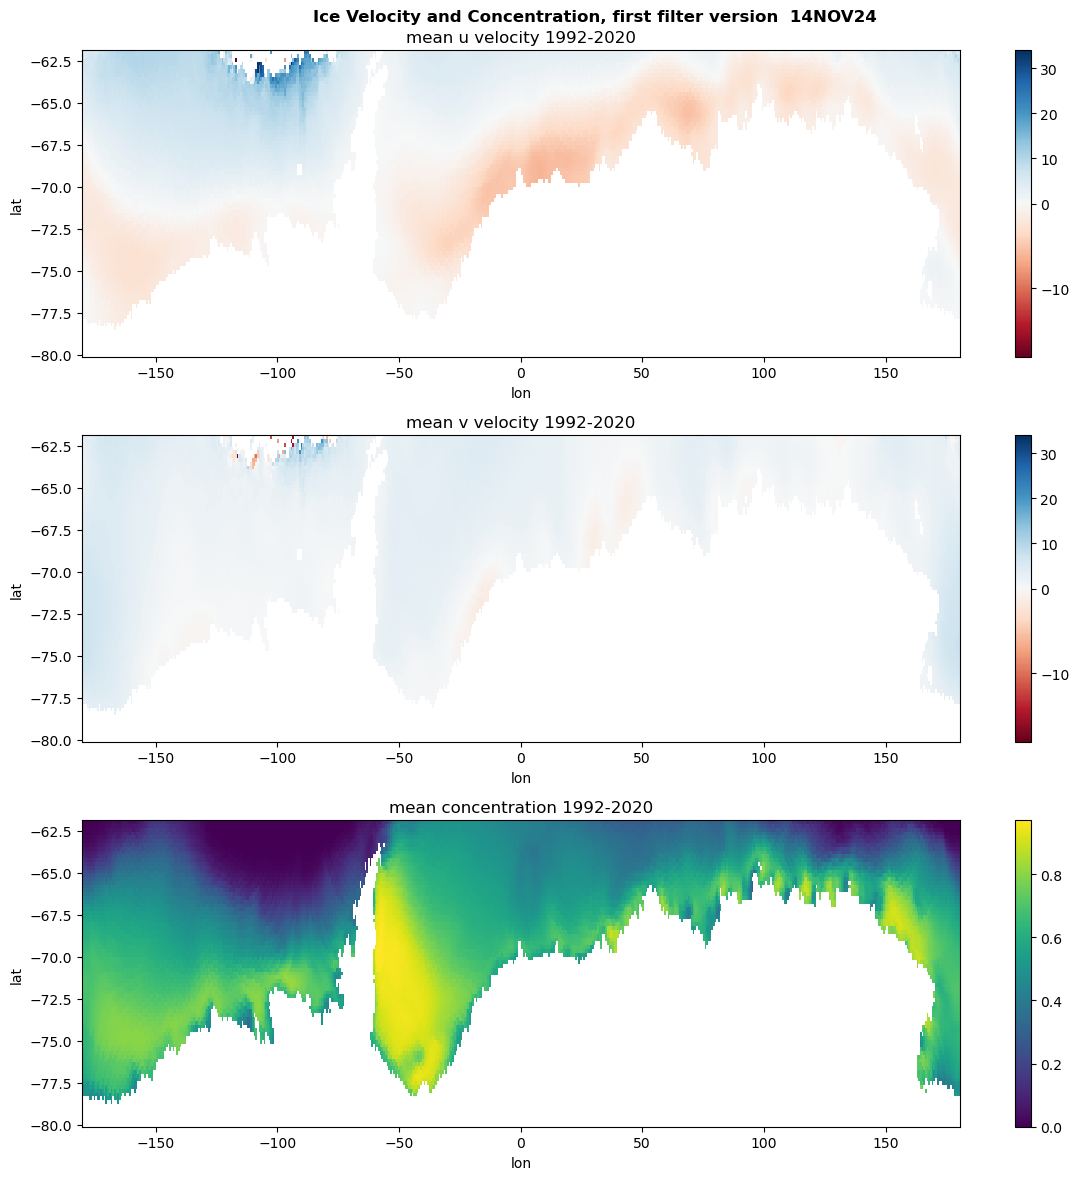

In [31]:
mean_u = np.nanmean(ui, axis = 0)

mean_v = np.nanmean(vi, axis = 0)

mean_c = np.nanmean(ic, axis = 0)

cmap = 'RdBu'
norm = TwoSlopeNorm(vcenter = 0)

# Plot difference (southern ocean)
fig, axs = plt.subplots(nrows = 3, ncols = 1, figsize = (12, 12))

plt0 = axs[0].pcolormesh(lon, lat, mean_u, cmap = cmap, norm = norm)
fig.colorbar(plt0, ax = axs[0])
axs[0].set_title(r'mean u velocity 1992-2020')
axs[0].set_xlabel('lon')
axs[0].set_ylabel('lat')

plt1 = axs[1].pcolormesh(lon, lat, mean_v, cmap = cmap, norm = norm)
fig.colorbar(plt1, ax = axs[1])
axs[1].set_title(r'mean v velocity 1992-2020')
axs[1].set_xlabel('lon')
axs[1].set_ylabel('lat')

plt2 = axs[2].pcolormesh(lon, lat, mean_c)
fig.colorbar(plt2, ax = axs[2])
axs[2].set_title(r'mean concentration 1992-2020')
axs[2].set_xlabel('lon')
axs[2].set_ylabel('lat')

fig.suptitle(f'Ice Velocity and Concentration, first filter version  14NOV24', fontweight = 'bold')
fig.tight_layout()

fnam = f"mean_vel_con_filter1_14NOV24.jpeg"
save_path = os.path.join(PATH_DEST, fnam)
plt.savefig(save_path, format='jpeg', dpi=300)

plt.show()